<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* roc_curve, roc_auc_score
* PCA

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, time, date, timezone, timedelta
import matplotlib.pyplot as plt
import sklearn.datasets as skd 
import plotnine as gg
from plotnine import ggplot, aes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

# roc_curve, roc_auc_score

In [5]:
raw = dict(zip(sns.get_dataset_names(), [sns.load_dataset(a) for a in sns.get_dataset_names()]))
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [7]:
d1 = raw['penguins']
d1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [12]:
d1.shape

(344, 7)

In [8]:
d1.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
d2 = pd.get_dummies(d1, columns = ['island', 'sex'])
d2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,NaN,NaN,NaN,NaN,0,0,1,0,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0


In [36]:
test = d2[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_Female', 'sex_Male']]
test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,NaN,NaN,NaN,NaN,0,0
4,36.7,19.3,193.0,3450.0,1,0


In [37]:
test = test.assign(sex = np.where(test.sex_Female == 1, 'F', 'M'))
test.drop(columns = ['sex_Female', 'sex_Male'],axis = 1, inplace = True)
test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,M
1,39.5,17.4,186.0,3800.0,F
2,40.3,18.0,195.0,3250.0,F
3,NaN,NaN,NaN,NaN,M
4,36.7,19.3,193.0,3450.0,F


In [38]:
test = pd.melt(test, id_vars = 'sex')
test.head()

,sex,variable,value
0,M,bill_length_mm,39.1
1,F,bill_length_mm,39.5
2,F,bill_length_mm,40.3
3,M,bill_length_mm,NaN
4,F,bill_length_mm,36.7


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 8 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


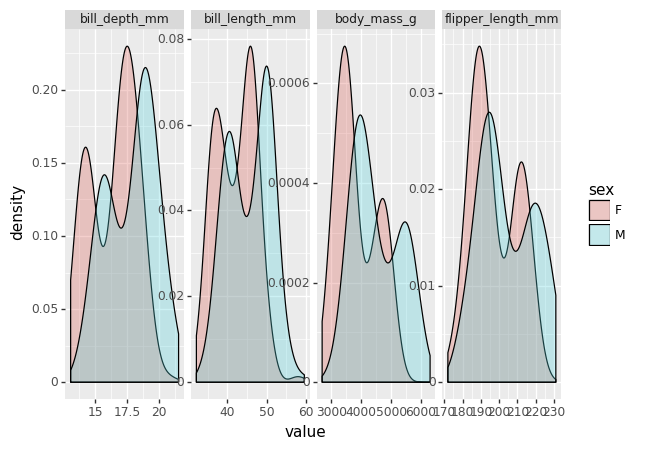

<ggplot: (8763642857533)>

In [39]:
(
    ggplot(test, aes('value', fill = 'sex')) +
    gg.geom_density(alpha = .3) +
    gg.facet_wrap('~variable', nrow = 1, scales = 'free')
)

In [40]:
imputer= KNNImputer(n_neighbors = 5)

In [41]:
d_ = imputer.fit_transform(d2.drop(['species'], axis = 1))
d_

array([[ 39.1,  18.7, 181. , ...,   1. ,   0. ,   1. ],
       [ 39.5,  17.4, 186. , ...,   1. ,   1. ,   0. ],
       [ 40.3,  18. , 195. , ...,   1. ,   1. ,   0. ],
       ...,
       [ 50.4,  15.7, 222. , ...,   0. ,   0. ,   1. ],
       [ 45.2,  14.8, 212. , ...,   0. ,   1. ,   0. ],
       [ 49.9,  16.1, 213. , ...,   0. ,   0. ,   1. ]])

In [42]:
d3 = pd.DataFrame(np.c_[d2.species.values.reshape(-1,1), d_], columns = d2.columns)
d3.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0.0,0.0,1.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,0.0,1.0,1.0,0.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,0.0,1.0,1.0,0.0
3,Adelie,38.52,17.9,188.0,3685.0,0.0,0.0,1.0,0.0,0.0
4,Adelie,36.7,19.3,193.0,3450.0,0.0,0.0,1.0,1.0,0.0


In [43]:
test2 = d3[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_Female', 'sex_Male']]
test2 = test2.assign(sex = np.where(test2.sex_Female == 1, 'F', 'M'))
test2.drop(columns = ['sex_Female', 'sex_Male'],axis = 1, inplace = True)
test2 = pd.melt(test2, id_vars = 'sex')
test2.head()

,sex,variable,value
0,M,bill_length_mm,39.1
1,F,bill_length_mm,39.5
2,F,bill_length_mm,40.3
3,M,bill_length_mm,38.52
4,F,bill_length_mm,36.7


In [44]:
test.insert(0, 'type', 'raw')
test2.insert(0, 'type', 'imputed')

In [58]:
test3 = pd.concat([test, test2], axis = 0)
test3['value'] = test3['value'].astype(float)
test3.head()

,type,sex,variable,value
0,raw,M,bill_length_mm,39.1
1,raw,F,bill_length_mm,39.5
2,raw,F,bill_length_mm,40.3
3,raw,M,bill_length_mm,NaN
4,raw,F,bill_length_mm,36.7


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 8 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


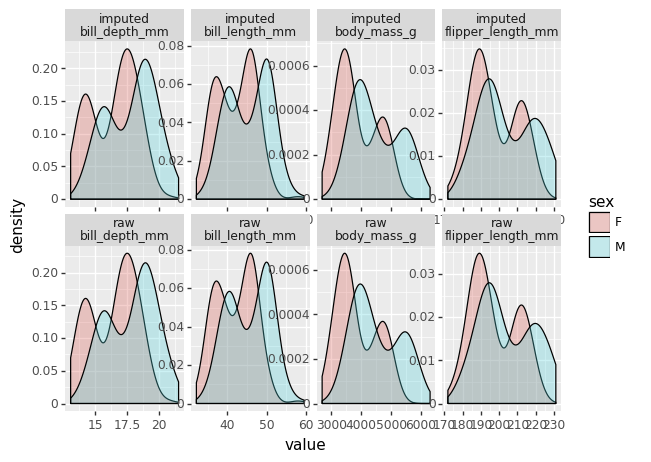

<ggplot: (8763640902133)>

In [60]:
(
    ggplot(test3, aes('value', fill = 'sex')) +
    gg.geom_density(alpha = .3) +
    gg.facet_wrap('~type + variable', scales = 'free', nrow = 2)
)

In [62]:
x = d3[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_Female', 'sex_Male']]
y = d3['species']

In [63]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [66]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)

In [67]:
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)

In [69]:
accuracy_score(y_tr, fit_rf.predict(x_tr)), accuracy_score(y_te, pred_rf)

(1.0, 1.0)

(array([79.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  5., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

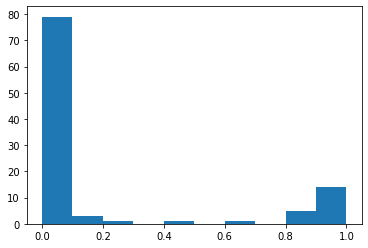

In [78]:
plt.hist(proba_rf[:,1])

# PCA

In [83]:
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [105]:
a1 = raw['diamonds']
a1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [106]:
scaled = a1[['carat', 'depth', 'table', 'price', 'x', 'y','z']]
oh = pd.get_dummies(a1[['color', 'clarity']], columns = ['color', 'clarity'])

In [107]:
scaler = StandardScaler()
scaled_ = scaler.fit_transform(scaled)
scaled_

array([[-1.19816781, -0.17409151, -1.09967199, ..., -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129, -1.36073849,  1.58552871, ..., -1.64132529,
        -1.65877419, -1.74117497],
       [-1.19816781, -3.38501862,  3.37566251, ..., -1.49869105,
        -1.45739502, -1.74117497],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.06343409,
        -0.04774083,  0.03013526],
       [ 0.13092691, -0.52310533,  0.24292836, ...,  0.37338325,
         0.33750627,  0.28520393],
       [-0.10113725,  0.31452784, -1.09967199, ...,  0.08811478,
         0.11861587,  0.14349912]])

In [117]:
a2 = pd.DataFrame(np.c_[np.array(a1['cut'].values).reshape(-1,1),oh.values, scaled_], 
             columns = ['cut'] + list(oh.columns) + ['carat', 'depth', 'table', 'price', 'x', 'y','z'])
a2.head()

,cut,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_VVS1,...,clarity_SI1,clarity_SI2,clarity_I1,carat,depth,table,price,x,y,z
0,Ideal,0,1,0,0,0,0,0,0,0,...,0,1,0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,Premium,0,1,0,0,0,0,0,0,0,...,1,0,0,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,Good,0,1,0,0,0,0,0,0,0,...,0,0,0,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,Premium,0,0,0,0,0,1,0,0,0,...,0,0,0,-1.071587,0.454133,0.242928,-0.90209,-1.364971,-1.317305,-1.28772
4,Good,0,0,0,0,0,0,1,0,0,...,0,1,0,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [118]:
pca = PCA(n_components = 10)
x_ = pca.fit_transform(a2.drop('cut', axis = 1))

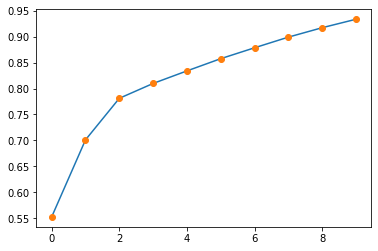

In [123]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), 'o')

In [132]:
x_ = pd.DataFrame(np.c_[x_, np.array(a1['cut'].values).reshape(-1,1)],
             columns = [f'pc{a}' for a in range(1,11)] + ['cut']
             )
x_.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,cut
0,-3.117385,-0.390507,-0.690699,0.033124,0.369657,0.356939,-0.25539,-0.981328,0.311479,-0.430591,Ideal
1,-3.053942,2.29521,0.48539,0.411873,-0.155502,-0.823659,-0.016284,-0.752467,0.22626,-0.129152,Premium
2,-2.723376,4.985221,0.33159,-0.32596,-0.248661,-0.179787,-0.456026,-0.972714,-0.210935,0.443424,Good
3,-2.608362,0.000608,0.650093,-0.623964,0.406945,-0.270637,0.265124,0.211096,-0.145474,0.050879,Premium
4,-2.364134,-0.464013,1.113048,-0.011359,0.161131,0.61936,-0.240391,-0.165998,0.05403,-0.429649,Good


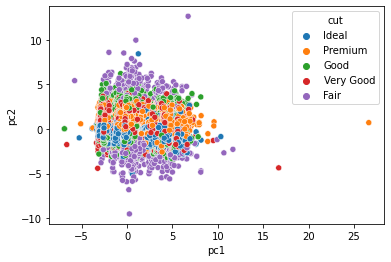

In [136]:
sns.scatterplot(data = x_, x = 'pc1', y = 'pc2', hue = 'cut')